# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Descrição dos dados

### 1.1 Descrição do conjunto de dados

O conjunto de dados "Titanic - Machine Learning From Disaster" contém informações detalhadas sobre as vítimas do Titanic, que naufragou em 1912. A base de dados possui 891 entradas e 15 colunas, representando diversas características dos passageiros, incluindo dados demográficos, informações sobre a viagem e a sobrevivência. Algumas colunas têm valores ausentes, como idade e convés. Este dataset permite explorar fatores que influenciaram a sobrevivência no naufrágio.

### 1.2 Conjunto de dados

In [2]:
df = pd.read_csv("../data/raw/data.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


> A base de dados possui 891 entradas e 15 colunas.

### 1.3 Dados faltantes

In [3]:
dados_faltantes = df.isnull().sum()
dados_faltantes = dados_faltantes[dados_faltantes > 0]
print(dados_faltantes)

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


> De acordo com os dados fornecidos, percebe-se que há 177 dados faltantes para a variável **age**, 2 para a variável **embarked**, 688 para a variável **deck** e 2 para a variável **embarked_town**. As demais variáveis não possuem dados faltantes.

### 1.4 Dicionário de dados

In [4]:
dicionario = pd.read_csv("../data/external/dictionary.csv")
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Indica se o passageiro sobreviveu ou não.,qualitativa,nominal
1,pclass,Indica a classe do passageiro usando números i...,qualitativa,ordinal
2,sex,Indica o gênero do passageiro.,qualitativa,nominal
3,age,Indica a idade do passageiro.,quantitativa,contínua
4,sibsp,Indica a quantidade de irmãos e/ou conjuguês a...,quantitativa,discreta
5,parch,indica a quantidade de pais e/ou filhos a bordo.,quantitativa,discreta
6,fare,indica o valor da tarifa paga pelo passageiro.,quantitativa,contínua
7,embarked,indica o porto de embarcação do passageiro.,qualitativa,nominal
8,class,Indica a classe do passageiro usando string.,qualitativa,ordinal
9,who,"Indica se é um homem, mulher ou criança.",qualitativa,nominal


> O dataset possui 15 variáveis, sendo 8 qualitativas nominais, 3 qualitativas ordinais, 2 quantitativas discretas e 2 quantitativas contínuas.

## 2. Perguntas de partida e hipóteses

### 2.1 Perguntas

- Qual foi a taxa geral de sobreviência dos passageiros?
- Qual foi a taxa de sobrevivência por gênero? 
- O valor da taxa paga pelo passageiro influenciou na sua chance de sobrevivência?
- Os passageiros embarcados em diferentes portos (Cherbourg, Queenstown, Southampton) tiveram diferentes taxas de sobrevivência?
- A idade dos passageiros influenciou a sua probabilidade de sobrevivência? 
- As crianças tiveram uma taxa de sobrevivência maior do que os adultos?
- Qual classe teve a maior taxa de sobrevicência?

### 2.2 Hipóteses

- Mulheres tem uma taxa de sobrevivência maior do que a dos homens.
- Passageiros que pagaram um valor mais alto na tarifa tiveram mais chances de sobrevivência.
- Passageiros que embarcaram em Southampton tiveram uma maior taxa de sobrevivência do que os de Cherbourg e Queenstown.
- Crianças tiveram uma maior taxa de sobreviência do que os adultos.

####  Qual foi a taxa geral de sobrevivência dos passageiros?

In [5]:
total_passageiros = df.shape[0]
print(f"Total de passageiros: {total_passageiros}")

Total de passageiros: 891


In [6]:
sobreviventes = df['survived'].sum()
print(f"Total de sobreviventes: {sobreviventes}")

Total de sobreviventes: 342


In [7]:
taxa_nao_sobrevivencia = ((total_passageiros - sobreviventes) / total_passageiros) * 100

In [8]:
taxa_geral = (sobreviventes / total_passageiros) *100
print(f"Taxa geral de sobreviventes: {taxa_geral:.2f}%")

Taxa geral de sobreviventes: 38.38%


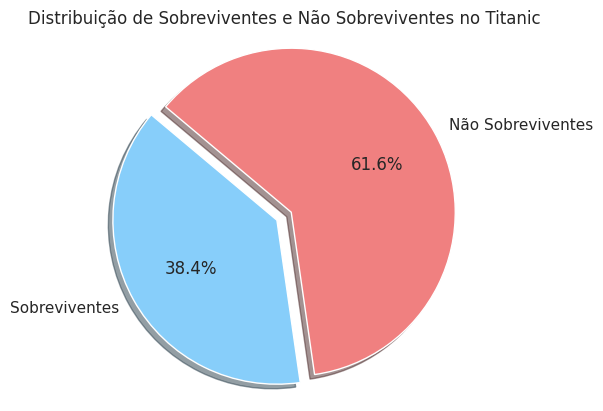

In [9]:
labels = ['Sobreviventes', 'Não Sobreviventes']
sizes = [taxa_geral, taxa_nao_sobrevivencia]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.title("Distribuição de Sobreviventes e Não Sobreviventes no Titanic")

plt.show()

#### Qual foi a taxa de sobrevivência por gênero?

In [10]:
total_passageiros

891

In [11]:
total_genero = df['sex'].value_counts()
total_genero

male      577
female    314
Name: sex, dtype: int64

In [12]:
sobreviventes_genero = df[df['survived'] == 1].groupby('sex').size()
sobreviventes_genero

sex
female    233
male      109
dtype: int64

In [13]:
taxa_sobrevivencia_genero = (sobreviventes_genero / total_genero) * 100
print(taxa_sobrevivencia_genero)

female    74.203822
male      18.890815
dtype: float64


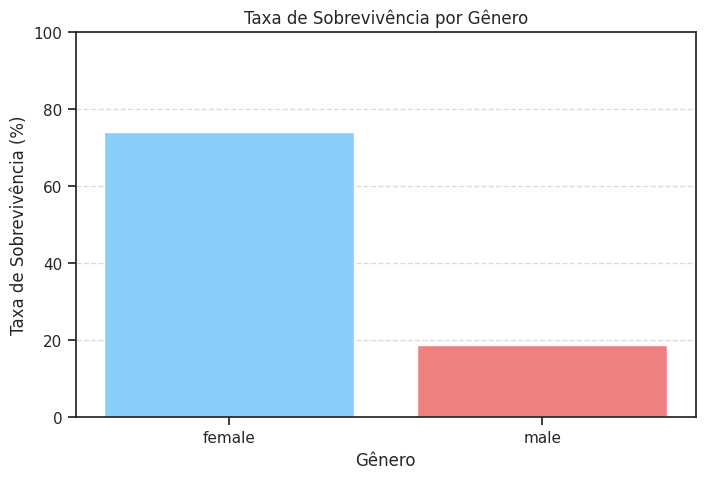

In [14]:
plt.figure(figsize=(8, 5))  
plt.bar(taxa_sobrevivencia_genero.index, taxa_sobrevivencia_genero.values, color=['lightskyblue', 'lightcoral'])
plt.xlabel('Gênero')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.title('Taxa de Sobrevivência por Gênero')
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

#### O valor da taxa paga pelo passageiro influenciou na sua chance de sobrevivência?

In [15]:
tarifa_sobreviventes = df.groupby('survived')['fare'].describe()
tarifa_sobreviventes

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


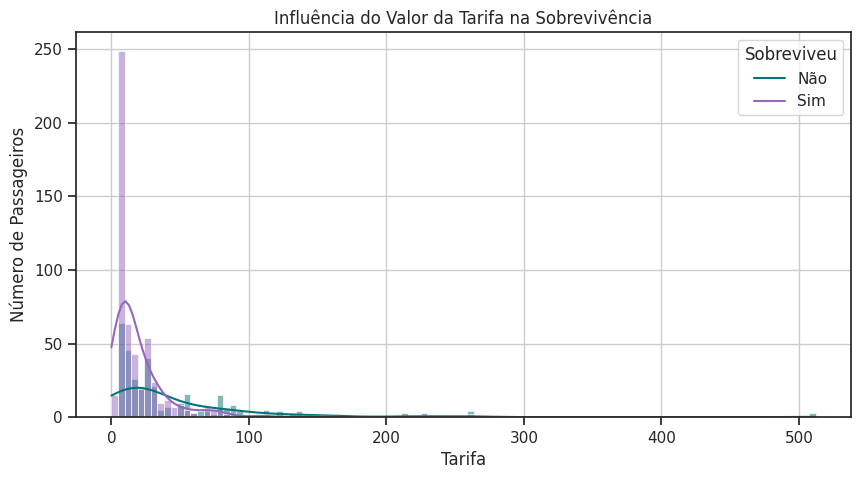

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x='fare', hue='survived', kde=True)
plt.title('Influência do Valor da Tarifa na Sobrevivência')
plt.xlabel('Tarifa')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.grid(True)
plt.show()

#### Os passageiros embarcados em diferentes portos (Cherbourg, Queenstown, Southampton) tiveram diferentes taxas de sobrevivência?

In [17]:
taxa_porto = df.groupby('embarked')['survived'].mean() * 100
print(taxa_porto)

embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64


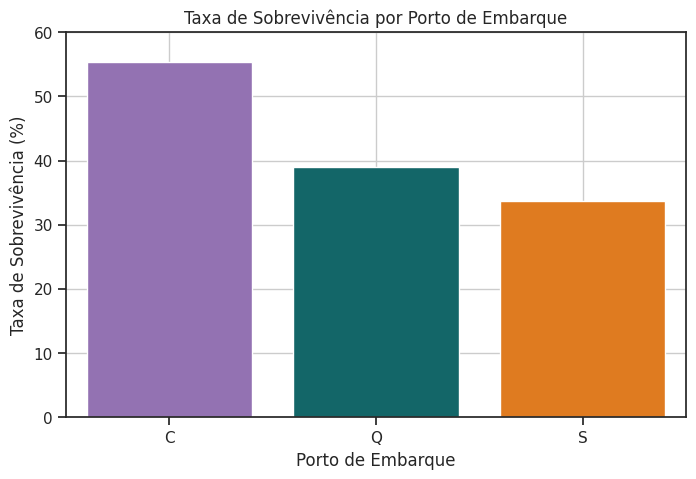

In [18]:
plt.figure(figsize=(8, 5))
sns.barplot(x=taxa_porto.index, y=taxa_porto.values)
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.ylim(0, 60)
plt.grid(True)
plt.show()

#### A idade dos passageiros influenciou a sua probabilidade de sobrevivência?

In [19]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

In [20]:
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
sobreviventes_idade = df.groupby('age_group')['survived'].mean() * 100
sobreviventes_idade

age_group
0-10       61.290323
11-20      40.196078
21-30      35.000000
31-40      43.712575
41-50      38.202247
51-60      41.666667
61-70      31.578947
71-80       0.000000
81-90     100.000000
91-100           NaN
Name: survived, dtype: float64

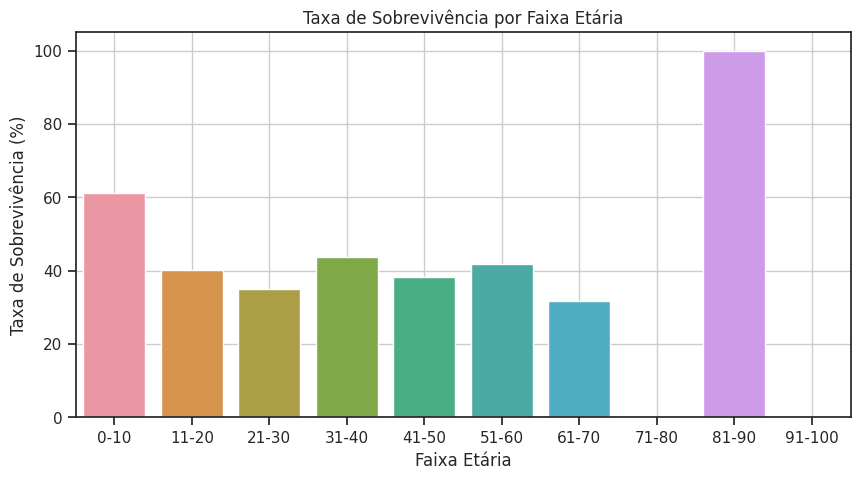

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x=sobreviventes_idade.index, y=sobreviventes_idade.values)
plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.grid(True)
plt.show()

#### As crianças tiveram uma taxa de sobrevivência maior do que os adultos?

In [22]:
df['adulto'] = (df['who'] == 'man') | (df['who'] == 'woman') | (df['adult_male'] == True)
criancas = df[df['who'] == 'child']
adultos = df[df['adulto'] == True]

In [23]:
taxa_sobrevivencia_criancas = criancas['survived'].mean()
taxa_sobrevivencia_adultos = adultos['survived'].mean()

In [24]:
print(f"Taxa de sobrevivência de crianças: {taxa_sobrevivencia_criancas:.2f}")
print(f"Taxa de sobrevivência de adultos: {taxa_sobrevivencia_adultos:.2f}")

Taxa de sobrevivência de crianças: 0.59
Taxa de sobrevivência de adultos: 0.36


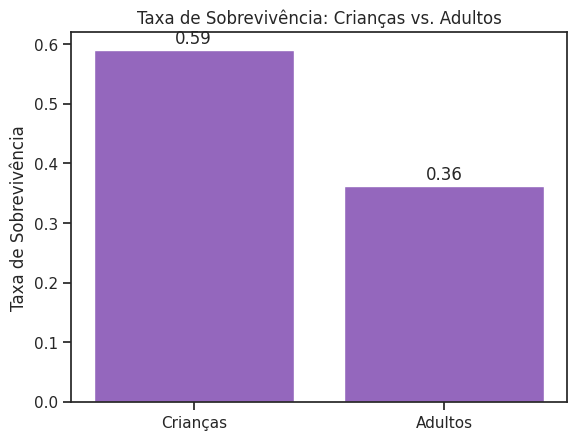

In [25]:
grupos = ['Crianças', 'Adultos']
taxas_de_sobrevivencia = [taxa_sobrevivencia_criancas, taxa_sobrevivencia_adultos]

plt.bar(grupos, taxas_de_sobrevivencia)
plt.ylabel('Taxa de Sobrevivência')
plt.title('Taxa de Sobrevivência: Crianças vs. Adultos')

for i, v in enumerate(taxas_de_sobrevivencia):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()

#### Qual classe teve a maior taxa de sobrevicência?

In [26]:
taxas_sobrevivencia_por_classe = df.groupby('class')['survived'].mean()
taxas_sobrevivencia_por_classe

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

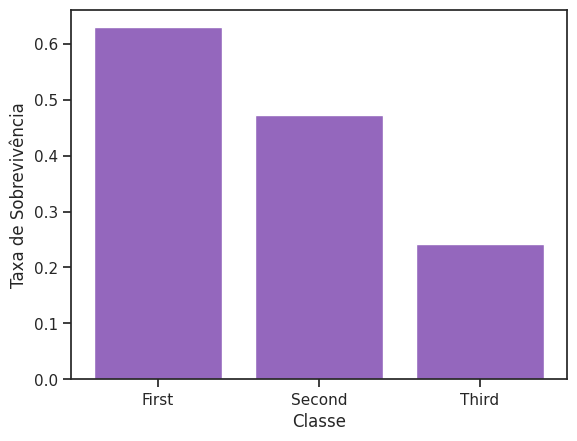

In [27]:
plt.bar(taxas_sobrevivencia_por_classe.index, taxas_sobrevivencia_por_classe.values)
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

## 3. Insights

### 3.1 Resultado das hipóteses

#### Mulheres tem uma taxa de sobrevivência maior do que a dos homens.
- Confirmado: 74,20% vs. 18,89%.

####  Passageiros que pagaram um valor mais alto na tarifa tiveram mais chances de sobrevivência.
- Confirmado: A análise gráfica mostrou uma correlação entre tarifas mais altas e maior chance de sobrevivência.

#### Passageiros que embarcaram em Southampton tiveram uma maior taxa de sobrevivência do que os de Cherbourg e Queenstown.
- Não confirmado: Cherbourg teve a maior taxa de sobrevivência (55,36%), seguida por Queenstown (38,96%) e Southampton (33,90%).

#### Crianças tiveram uma maior taxa de sobreviência do que os adultos.
- Confirmado: 53,98% para crianças vs. 36,12% para adultos.

### 3.2 Conclusões

- A taxa geral de sobrevivência foi baixa, com apenas 38,38% dos passageiros sobrevivendo ao naufrágio.
- Mulheres e crianças tiveram uma maior taxa de sobreviência.
- Passageiros que pagaram uma tarifa mais alta tiveram uma maior taxa de sobrevivência.
- Passageiros que embarcaram no porto de Cherbourg tiveram uma maior taxa de sobrevivência.

## 4. Observações

Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxílio de algum especialista no assunto.